<a href="https://colab.research.google.com/github/rklepov/hse-cs-ml-2018-2019/blob/homework/09-NLP/HW/hw1/nlp_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *NLP HW1*

### [*Задание*](https://github.com/rklepov/hse-cs-ml-2018-2019/blob/master/09-NLP/01-preprocessing/texts_sem1.ipynb)

Скачать текст ["Капитанской дочки"](https://www.dropbox.com/s/aky2md6724r3yww/%D0%BA%D0%B0%D0%BF%D0%B8%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F%20%D0%B4%D0%BE%D1%87%D0%BA%D0%B0.txt?dl=0)

1. Найти длину текста в токенах и леммах (после удаления пунктуации).
2. Проверить, соблюдается ли закон Ципфа и построить диаграмму с 20 самыми частотными словами (после удаления стоп-слов).
3. Найти среднюю длину предложения.
4. Найти самую частотную часть речи до удаления стоп-слов и после удаления. Постороить графики частотности частей речи.

---

In [0]:
!pip install rusenttokenize
!pip install pymorphy2

In [0]:
import re
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords 
nltk.download('stopwords')

from rusenttokenize import ru_sent_tokenize

import pymorphy2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
!ls -hAlF *.txt

-rw------- 1 root root 378K Sep 11 10:11 'капитанская дочка.txt'


In [0]:
with open('капитанская дочка.txt', 'r') as the_captains_daughter:
    full_text = the_captains_daughter.read()

## 1. *Токенизация*

In [7]:
tokenizer = WordPunctTokenizer()

tokens = tokenizer.tokenize(full_text)

print(f'Общее количество токенов:\n{len(tokens)}')

Общее количество токенов:
42234


Удалим токены, полностью состоящие из знаков препинания, а также удалим возможные оставшиеся знаки препинания по краям слов.

> *Прим.*: возможно, стоило удалить знаки препинания до выполнения токенизации, то есть токенизировать текст, уже очищенный от знаков препинания.

In [0]:
def make_remove_punct(regexp):
    re_punct = re.compile(regexp)
    def remove_punct(tokens):
        return [ w.strip(string.punctuation) for w in tokens if re_punct.match(w) is None ]
    return remove_punct

remove_punct = make_remove_punct(r'^[^\w]+$')

In [9]:
tokens = remove_punct(tokens)

print(f'Общее количество токенов после удаления пунктуации:\n{len(tokens)}')

Общее количество токенов после удаления пунктуации:
33107


In [10]:
print(tokens[:9999][-12:])

['Кто', 'просил', 'тебя', 'писать', 'на', 'меня', 'доносы', 'разве', 'ты', 'приставлен', 'ко', 'мне']


## 2. *Закон Ципфа*

In [0]:
def plot_token_freq(tokens, xlabel, title, n=20):
    np_tokens = np.array(list(tokens))
    uniq_tokens, token_count = np.unique(np_tokens, return_counts=True)
    count_order = np.argsort(-token_count)
    n = np.amin([n, len(uniq_tokens)])
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(n), token_count[count_order][:n], color='g')
    plt.xlabel(xlabel)
    plt.xticks(np.arange(n), uniq_tokens[count_order][:n])
    plt.ylabel('Количество вхождений')
    plt.title(f'{n} cамых {title}')
    plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.show()

Приведение к нижнему регистру, удаление стоп-слов.

In [0]:
stopwords_ru = stopwords.words('russian')

In [13]:
tokens_lower = [ w.lower() for w in tokens if w.lower() ]

tokens_no_stop_words = [ w for w in tokens_lower if w not in stopwords_ru ]

len(tokens_lower), len(tokens_no_stop_words)

(33107, 20482)

Сначала посмотрим на частотность слов без лемматизации.

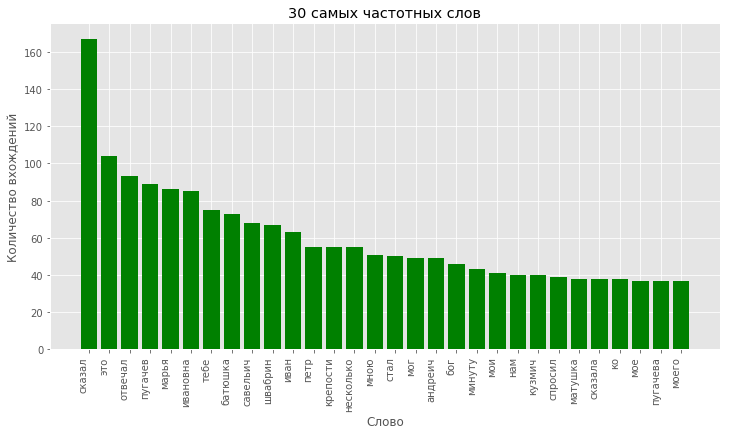

In [14]:
plot_token_freq(tokens_no_stop_words, 'Слово', 'частотных слов', 30);

Теперь посмотрим на частотность слов после лемматизации.

> *Прим.*: некоторые слова после лемматизации преобразуются в форму, которая по факту входит в список стоп-слов, хотя при этом оригинальная форма туда не входила (напр. `'тебе'` -> `'ты'`). Не знаю, следует ли повторно проводить фильтрацию стоп-слов после лемматизации?

In [0]:
morph = pymorphy2.MorphAnalyzer()

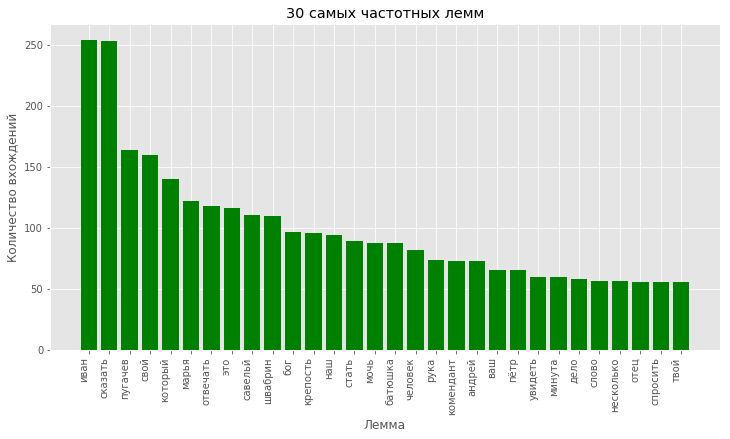

In [16]:
lemmas = [ morph.normal_forms(w)[0] for w in tokens_no_stop_words ]

lemmas = [ lemma for lemma in lemmas if lemma not in stopwords_ru ]

plot_token_freq(lemmas, 'Лемма', 'частотных лемм', 30);

Думаю, что в целом можно утверждать, что закон Ципфа выполняется. Возможно, имена собственные здесь вносят некоторое искажение, но это уже особенность художественного произведения.

## 3. *Предложения*

In [0]:
sentences = ru_sent_tokenize(full_text) 

In [18]:
print(f'Всего предложений: {len(sentences)}')

Всего предложений: 3116


In [19]:
sentences[:1000][-5:]

['Со Швабриным встречался редко и неохотно, тем более что замечал в нем скрытую к себе неприязнь, что и утверждало меня в моих подозрениях.',
 'Жизнь моя сделалась мне несносна.',
 'Я впал в мрачную задумчивость, которую питали одиночество и бездействие.',
 'Любовь моя разгоралась в уединении и час от часу становилась мне тягостнее.',
 'Я потерял охоту к чтению и словесности.']

In [0]:
sentences_tokenized = [  remove_punct(tokenizer.tokenize(s)) for s in sentences ]

In [21]:
print(f'Средняя длина предложения: {np.mean([ len(s) for s in sentences ]):.2f} букв'
      f', {np.mean([len(s) for s in sentences_tokenized]):.2f} слов')

Средняя длина предложения: 67.29 букв, 10.62 слов


## 4. [*Части речи*](https://pymorphy2.readthedocs.io/en/latest/user/grammemes.html#russian-pos "OpenCorpora: открытый корпус русского языка")

По анализу [**pymorphy2**](https://pymorphy2.readthedocs.io/en/latest/user/guide.html#id4 "Руководство пользователя &mdash; Морфологический анализатор pymorphy2") *до* удаления стоп слов. Токены, для которых [часть речи](http://opencorpora.org/dict.php?act=gram "OpenCorpora: открытый корпус русского языка") не была определена исключаем.

In [0]:
def morph_parse_pos(tokens):
    pos = ( morph.parse(w)[0].tag.POS for w in tokens )
    return ( morph.lat2cyr(p) for p in pos if not p is None )

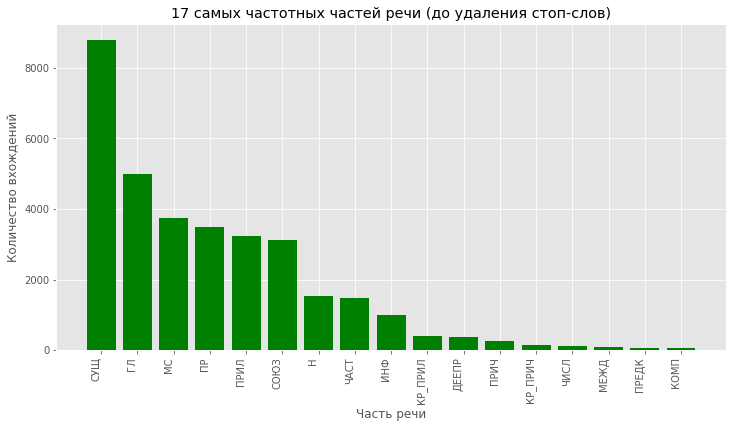

In [23]:
plot_token_freq(morph_parse_pos(tokens_lower), 'Часть речи', 'частотных частей речи (до удаления стоп-слов)');

По анализу [**pymorphy2**](https://pymorphy2.readthedocs.io/en/latest/user/guide.html#id4 "Руководство пользователя &mdash; Морфологический анализатор pymorphy2") *после* удаления стоп слов.

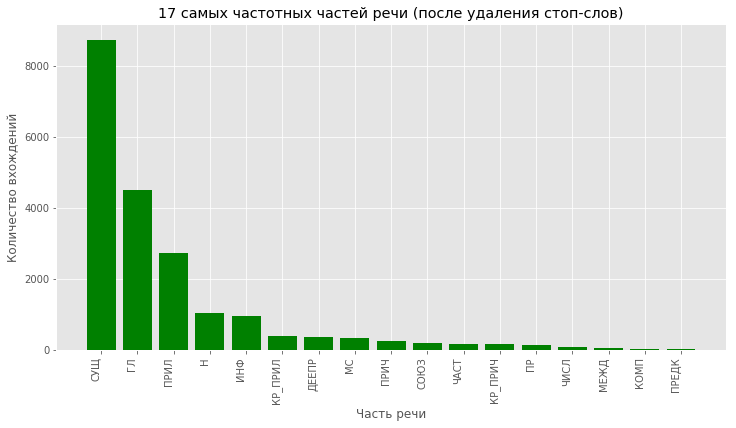

In [24]:
plot_token_freq(morph_parse_pos(tokens_no_stop_words), 'Часть речи', 'частотных частей речи (после удаления стоп-слов)');